In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Algorithms import

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

Metrics import

In [3]:
from sklearn.metrics import accuracy_score,classification_report

Over Sampling Imports

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [5]:
df=pd.read_csv('C:\\Users\\Dell\\Desktop\\Data Science\\Projects\\Stroke Prediction\\data\\dataset.csv')

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Currently by looking at this description
<br>
-> age will have many outliers and need to be treated<br>
-> bmi too <br>
-> stroke might have some values other than 0 and 1. That needs to be treated

In [9]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
print(df['bmi'].mean())
print()
print(df['bmi'].min())
print()
print(df['bmi'].max())

28.605038390004296

10.1

97.6


In [11]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [12]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [13]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [14]:
df['smoking_status'].dtype

dtype('O')

In [15]:
df['smoking_status'].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [16]:
df['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: object

since class is already misbalanced we can fill it with never smoked

In [17]:
df['smoking_status']=df['smoking_status'].fillna(df['smoking_status'].mode()[0])

In [18]:
df['smoking_status'].value_counts()

smoking_status
never smoked       29345
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [19]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


Analyzing columns

In [22]:
df['gender'].value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

Dropping the data where the gender is other(since very less)

In [23]:
new_df=df[df['gender']=='Other']

In [24]:
new_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.400000,formerly smoked,0
10768,26188,Other,46.0,0,0,No,Private,Rural,83.28,28.605038,never smoked,0
15620,52984,Other,27.0,0,0,No,Private,Urban,62.45,28.605038,smokes,0
15838,24893,Other,53.0,0,0,Yes,Private,Rural,89.65,28.605038,never smoked,0
19748,13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.000000,formerly smoked,0
21041,31015,Other,19.0,0,0,No,Private,Rural,75.76,32.200000,formerly smoked,0
21192,27043,Other,49.0,0,0,Yes,Private,Urban,94.88,37.200000,never smoked,0
24252,51111,Other,51.0,0,0,Yes,Private,Rural,91.75,32.200000,formerly smoked,0
26199,42452,Other,10.0,0,0,No,children,Rural,72.05,21.200000,formerly smoked,0
26831,49812,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,28.605038,never smoked,0


In [25]:
df = df.drop(df[df['gender'] == 'Other'].index)


In [26]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [27]:
df['gender'].value_counts()

gender
Female    25665
Male      17724
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_16960\3671024668.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='gender',palette="Set1")


<Axes: xlabel='gender', ylabel='count'>

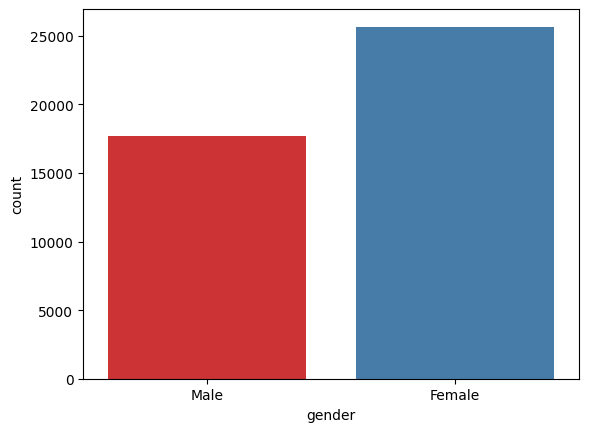

In [28]:
sns.countplot(data=df,x='gender',palette="Set1")

<Axes: xlabel='age', ylabel='Count'>

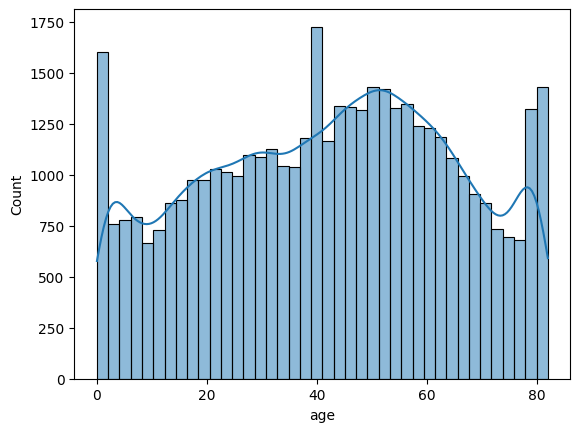

In [29]:
sns.histplot(x='age',data=df,kde=True)

<Axes: xlabel='hypertension', ylabel='count'>

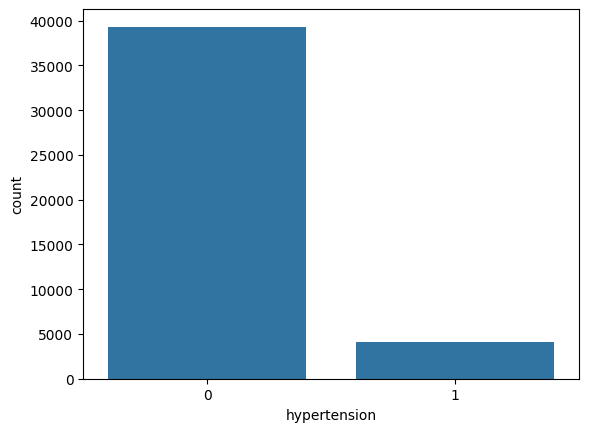

In [30]:
sns.countplot(data=df,x='hypertension')

Imbalancing we will use those techniques later and see

<Axes: xlabel='heart_disease', ylabel='count'>

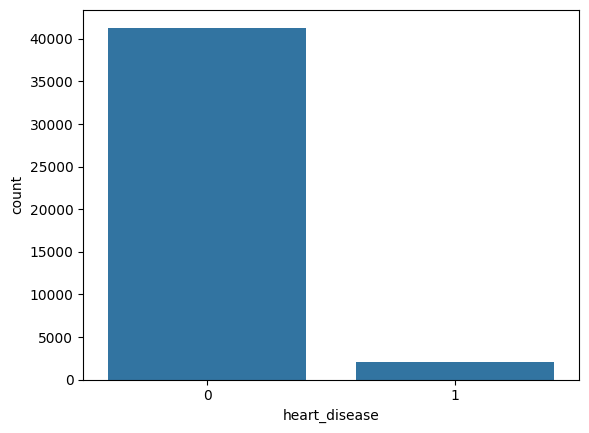

In [31]:
sns.countplot(data=df,x='heart_disease')

<Axes: xlabel='ever_married', ylabel='count'>

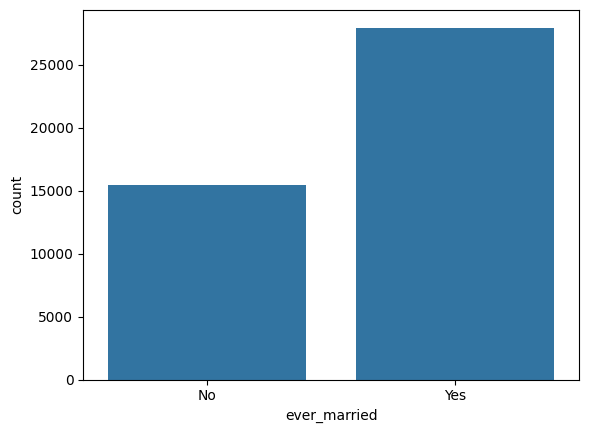

In [32]:
sns.countplot(data=df,x='ever_married')

<Axes: xlabel='work_type', ylabel='count'>

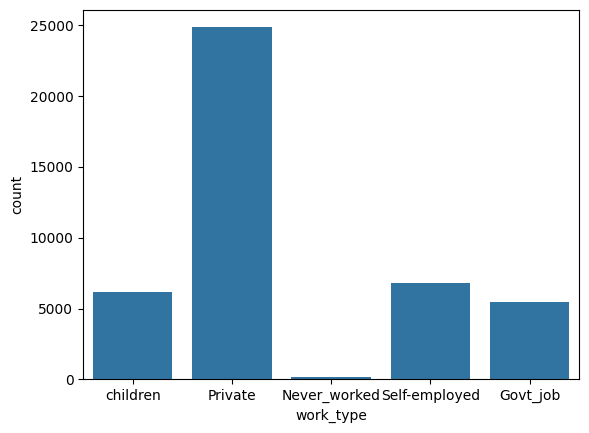

In [33]:
sns.countplot(data=df,x='work_type')

<Axes: xlabel='Residence_type', ylabel='count'>

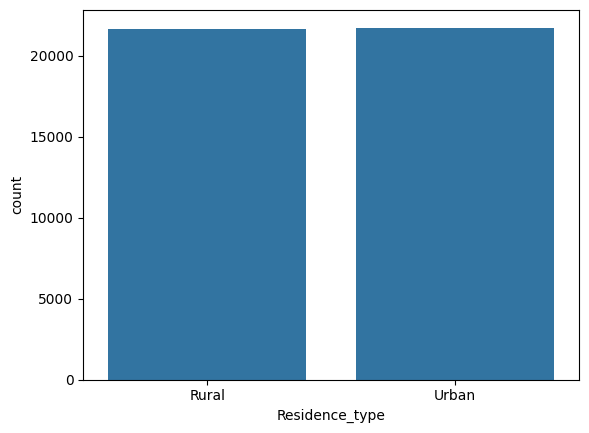

In [34]:
sns.countplot(data=df,x='Residence_type')

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

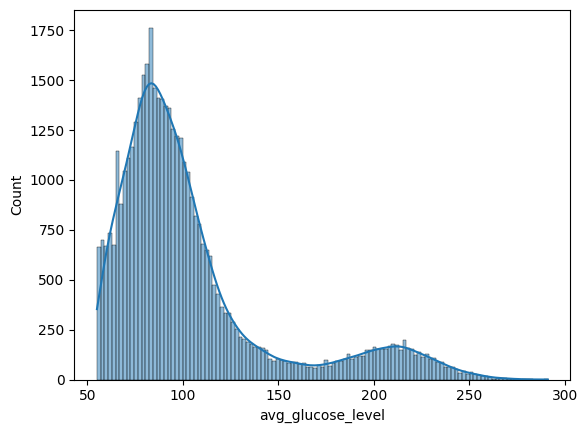

In [35]:
sns.histplot(x='avg_glucose_level',data=df,kde=True)

<h1>
VERY IMPORTANT
THERE IS SKEWNESS IN DATA.
SO WHILE BUILDING WEB APP WE WILL TAKE NORMAL INPUT BUT BEFORE PASSING THE VALUES TO MODEL WE WILL DO "np.log" and then pass it to model
<h1>

Log Transforming the 'avg_glucose_level'

In [36]:
df['avg_glucose_level']=np.log(df['avg_glucose_level'])

In [37]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,4.555139,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,4.476882,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,4.708539,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,4.234686,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,5.083142,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,4.071417,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,5.364152,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,4.521136,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,4.596735,33.2,never smoked,0


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

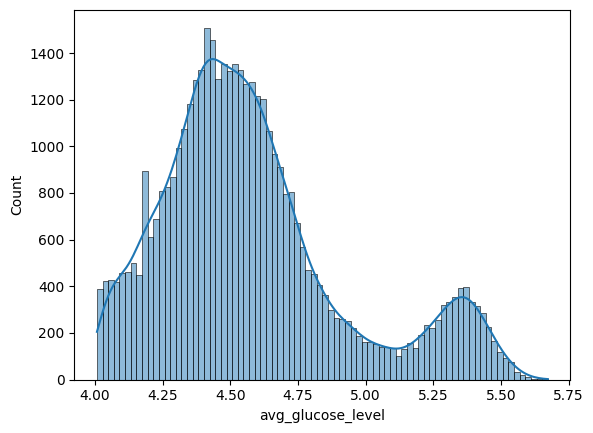

In [38]:
sns.histplot(x='avg_glucose_level',data=df,kde=True)

Still skewed but better than previous

<Axes: xlabel='bmi', ylabel='Count'>

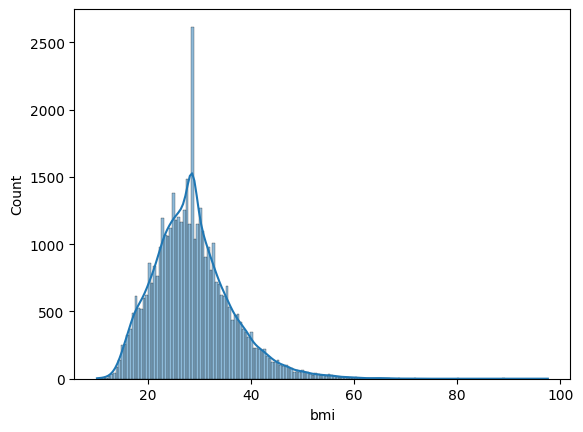

In [39]:
sns.histplot(x='bmi',data=df,kde=True)

In [40]:
df['bmi']=np.log(df['bmi'])

<Axes: xlabel='bmi', ylabel='Count'>

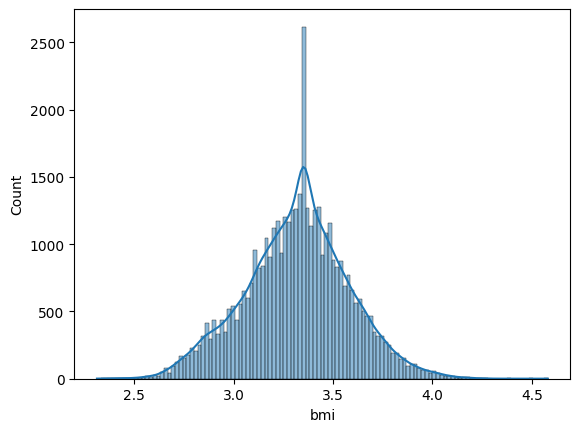

In [41]:
sns.histplot(x='bmi',data=df,kde=True)

In [42]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,4.555139,2.890372,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,4.476882,3.668677,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,4.708539,2.867899,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,4.234686,3.580737,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,5.083142,2.949688,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,4.071417,3.015535,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,5.364152,4.014580,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,4.521136,3.363842,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,4.596735,3.502550,never smoked,0


<h1>Glucose level and bmi were log transformed remember in web app</h1>

<Axes: xlabel='smoking_status', ylabel='count'>

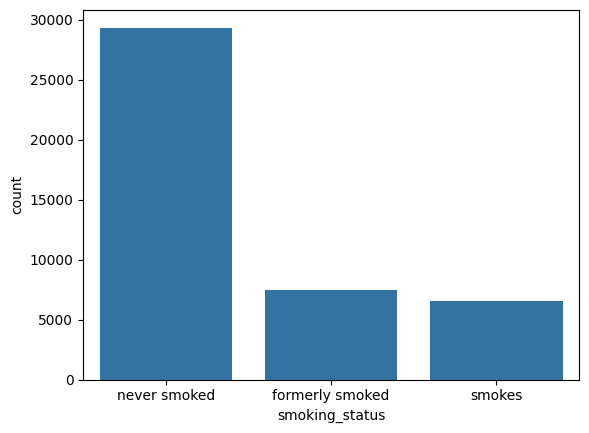

In [43]:
sns.countplot(x='smoking_status',data=df)

<Axes: xlabel='smoking_status', ylabel='count'>

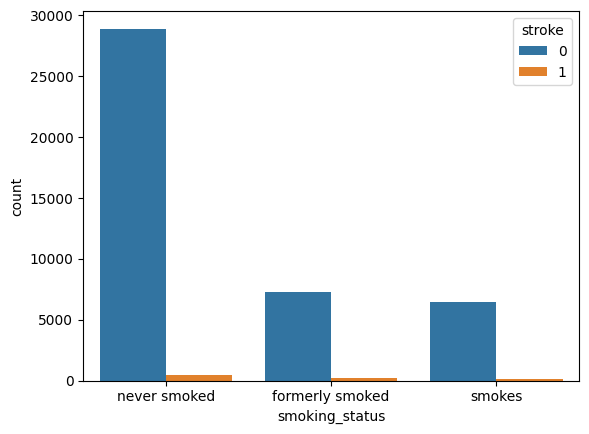

In [44]:
sns.countplot(x='smoking_status',data=df,hue='stroke')

Again imbalancing is the issue

Dropping id

In [45]:
df.drop('id',axis=1,inplace=True)

In [46]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,4.555139,2.890372,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,4.476882,3.668677,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,4.708539,2.867899,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,4.234686,3.580737,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,5.083142,2.949688,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,4.071417,3.015535,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,5.364152,4.014580,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,4.521136,3.363842,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,4.596735,3.502550,never smoked,0


In [47]:
cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [48]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,4.555139,2.890372,1,0
1,1,58.0,1,0,1,2,1,4.476882,3.668677,1,0
2,0,8.0,0,0,0,2,1,4.708539,2.867899,1,0
3,0,70.0,0,0,1,2,0,4.234686,3.580737,0,0
4,1,14.0,0,0,0,1,0,5.083142,2.949688,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,4,1,4.071417,3.015535,1,0
43396,0,56.0,0,0,1,0,1,5.364152,4.014580,0,0
43397,0,82.0,1,0,1,2,1,4.521136,3.363842,0,0
43398,1,40.0,0,0,1,2,1,4.596735,3.502550,1,0


Since avg_glucose_level and bmi are already log transformed we do not need to scale them. Apply scaling only on age column

In [49]:
df['age']

0         3.0
1        58.0
2         8.0
3        70.0
4        14.0
         ... 
43395    10.0
43396    56.0
43397    82.0
43398    40.0
43399    82.0
Name: age, Length: 43389, dtype: float64

<Axes: xlabel='age'>

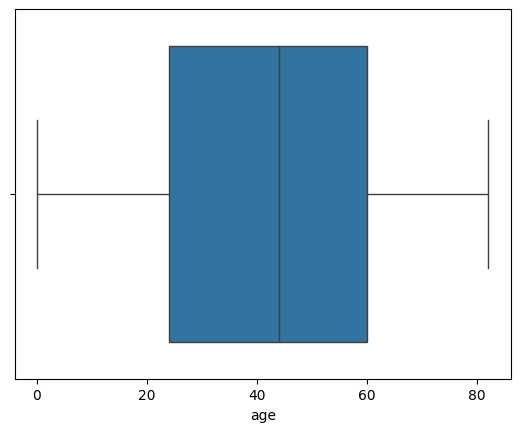

In [50]:
sns.boxplot(data=df,x='age')

since ab scale ho jaega ek baar heatmap dekh le

<Axes: >

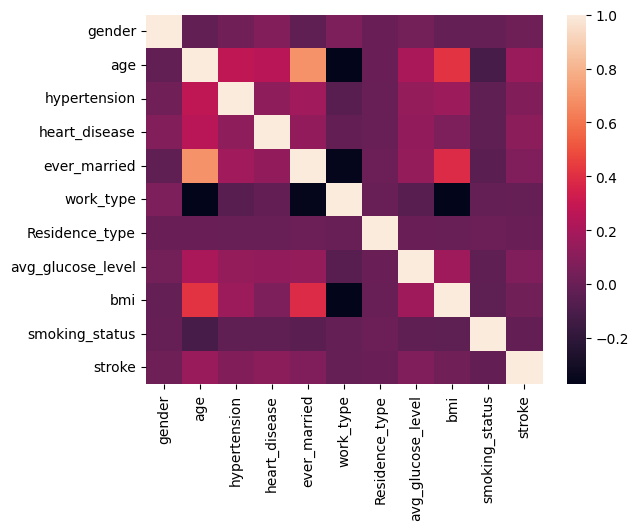

In [51]:
sns.heatmap(data=df.corr())

Scaling the dataset

In [52]:
sc=StandardScaler()

In [190]:
# Save the scaler
import pickle
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(sc, scaler_file)

In [53]:
df['age']=sc.fit_transform(df[['age']])

In [54]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,-1.741514,0,0,0,4,0,4.555139,2.890372,1,0
1,1,0.700706,1,0,1,2,1,4.476882,3.668677,1,0
2,0,-1.519494,0,0,0,2,1,4.708539,2.867899,1,0
3,0,1.233555,0,0,1,2,0,4.234686,3.580737,0,0
4,1,-1.253070,0,0,0,1,0,5.083142,2.949688,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,-1.430686,0,0,0,4,1,4.071417,3.015535,1,0
43396,0,0.611898,0,0,1,0,1,5.364152,4.014580,0,0
43397,0,1.766403,1,0,1,2,1,4.521136,3.363842,0,0
43398,1,-0.098566,0,0,1,2,1,4.596735,3.502550,1,0


<h1>BEWARE SCALING KIYA HAI ISSE WEB APP MAI IMPORT KRKE DUBARA KRNA HOGA BRO</h1>

Currently no feature selection(i do not think it is needed as only 10 features are there)

MODEL BUILDING ON IMBALANCED DATASET CURRENTLY

In [55]:
df_imbalanced=df

In [56]:
X=df_imbalanced.drop('stroke',axis=1)

In [57]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,-1.741514,0,0,0,4,0,4.555139,2.890372,1
1,1,0.700706,1,0,1,2,1,4.476882,3.668677,1
2,0,-1.519494,0,0,0,2,1,4.708539,2.867899,1
3,0,1.233555,0,0,1,2,0,4.234686,3.580737,0
4,1,-1.253070,0,0,0,1,0,5.083142,2.949688,1
...,...,...,...,...,...,...,...,...,...,...
43395,0,-1.430686,0,0,0,4,1,4.071417,3.015535,1
43396,0,0.611898,0,0,1,0,1,5.364152,4.014580,0
43397,0,1.766403,1,0,1,2,1,4.521136,3.363842,0
43398,1,-0.098566,0,0,1,2,1,4.596735,3.502550,1


In [58]:
Y=df_imbalanced['stroke']

In [59]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43389, dtype: int64

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,random_state=1234)

In [61]:
print('training shape')
print(f'{X_train.shape} {Y_train.shape}') 
print('testing shape')
print(f'{X_test.shape} {Y_test.shape}') 

training shape
(30372, 10) (30372,)
testing shape
(13017, 10) (13017,)


In [62]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
32382,0,-1.253070,0,0,0,4,0,4.782647,3.081910,1
8463,0,0.167858,0,0,1,2,1,4.653960,3.353583,2
35649,1,0.434282,0,0,1,0,1,4.136765,3.152736,2
34371,0,0.345474,1,0,1,2,0,4.398884,3.546740,1
18412,0,-0.631414,0,0,1,2,1,4.801888,3.496508,0
...,...,...,...,...,...,...,...,...,...,...
32409,0,-0.009758,0,0,1,2,0,4.459566,3.222868,2
17052,1,0.523090,0,1,1,3,0,4.721263,3.292126,1
23931,0,-0.098566,0,0,1,0,0,4.621831,3.332205,1
34096,0,0.523090,0,0,1,2,0,4.849840,3.269569,2


In [63]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
21592,0,-1.785918,0,0,0,4,0,4.389375,3.190476,1
26152,0,1.366767,0,1,1,2,1,5.289478,3.645450,0
35263,0,0.567494,0,0,1,3,1,4.258728,3.586293,0
37719,1,1.677595,0,0,1,3,1,4.495244,3.490429,1
32577,0,1.055939,0,0,1,2,1,4.412435,3.353583,1
...,...,...,...,...,...,...,...,...,...,...
9391,1,-0.009758,0,0,1,2,0,4.590260,3.380995,2
38239,1,0.389878,0,0,1,2,1,4.748838,3.218876,1
2069,0,-0.364990,0,0,1,2,0,5.444580,3.815512,1
16208,0,1.588787,0,0,1,2,1,4.644872,3.246491,1


In [64]:
Y_train

32382    0
8463     0
35649    1
34371    0
18412    0
        ..
32409    0
17052    0
23931    0
34096    0
27449    0
Name: stroke, Length: 30372, dtype: int64

In [65]:
Y_test

21592    0
26152    0
35263    0
37719    0
32577    0
        ..
9391     0
38239    0
2069     0
16208    0
20522    0
Name: stroke, Length: 13017, dtype: int64

Logisitic Regression

In [66]:
lr_imbalanced=LogisticRegression()

In [67]:
lr_imbalanced.fit(X_train,Y_train)

LogisticRegression()

In [68]:
Y_pred_lr_imbalanced=lr_imbalanced.predict(X_test)

In [69]:
score_lr_imbalanced=accuracy_score(Y_test,Y_pred_lr_imbalanced)

In [70]:
score_lr_imbalanced

0.9811016363217331

Accuracy is good but precision will be the main decider

In [71]:
pd.DataFrame(classification_report(Y_test,Y_pred_lr_imbalanced,output_dict=True)).T

c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,precision,recall,f1-score,support
0,0.981102,1.000000,0.990461,12771.000000
1,0.000000,0.000000,0.000000,246.000000
accuracy,0.981102,0.981102,0.981102,0.981102
macro avg,0.490551,0.500000,0.495230,13017.000000
weighted avg,0.962560,0.981102,0.971743,13017.000000


Now this is the isse with data imbalancing. Class 1 has 0 precision and f1. Ho skta training mai eko jagah na ho class 1 joki main hai

Random Forest

In [72]:
rfc_imbalanced=RandomForestClassifier()

In [73]:
rfc_imbalanced.fit(X_train,Y_train)

RandomForestClassifier()

In [74]:
Y_pred_rfc_imbalanced=rfc_imbalanced.predict(X_test)

In [75]:
score_rfc_imbalanced=accuracy_score(Y_test,Y_pred_rfc_imbalanced)

In [76]:
score_rfc_imbalanced

0.9810248137051548

In [77]:
pd.DataFrame(classification_report(Y_test,Y_pred_rfc_imbalanced,output_dict=True)).T

,precision,recall,f1-score,support
0,0.981174,0.999843,0.990421,12771.000000
1,0.333333,0.004065,0.008032,246.000000
accuracy,0.981025,0.981025,0.981025,0.981025
macro avg,0.657254,0.501954,0.499226,13017.000000
weighted avg,0.968931,0.981025,0.971855,13017.000000


K Nearest Neighbors

In [78]:
knn_imbalanced=KNeighborsClassifier()

In [79]:
knn_imbalanced.fit(X_train,Y_train)

KNeighborsClassifier()

In [80]:
Y_pred_knn_imbalanced=knn_imbalanced.predict(X_test)

In [81]:
score_knn_imbalanced=accuracy_score(Y_test,Y_pred_knn_imbalanced)

In [82]:
score_knn_imbalanced

0.9802565875393716

In [83]:
pd.DataFrame(classification_report(Y_test,Y_pred_knn_imbalanced,output_dict=True)).T

,precision,recall,f1-score,support
0,0.981086,0.999139,0.990030,12771.000000
1,0.000000,0.000000,0.000000,246.000000
accuracy,0.980257,0.980257,0.980257,0.980257
macro avg,0.490543,0.499569,0.495015,13017.000000
weighted avg,0.962545,0.980257,0.971320,13017.000000


Naive Bayes

In [84]:
gnb_imbalanced=GaussianNB()

In [85]:
gnb_imbalanced.fit(X_train,Y_train)

GaussianNB()

In [86]:
Y_pred_gnb_imbalanced=gnb_imbalanced.predict(X_test)

In [87]:
score_gnb_imbalanced=accuracy_score(Y_test,Y_pred_gnb_imbalanced)

In [88]:
score_gnb_imbalanced

0.9117308135515095

In [89]:
pd.DataFrame(classification_report(Y_test,Y_pred_gnb_imbalanced,output_dict=True)).T

,precision,recall,f1-score,support
0,0.986358,0.922794,0.953518,12771.000000
1,0.077643,0.337398,0.126236,246.000000
accuracy,0.911731,0.911731,0.911731,0.911731
macro avg,0.532000,0.630096,0.539877,13017.000000
weighted avg,0.969184,0.911731,0.937883,13017.000000


Decision Tree

In [90]:
dtc_imbalanced=DecisionTreeClassifier()

In [91]:
dtc_imbalanced.fit(X_train,Y_train)

DecisionTreeClassifier()

In [92]:
Y_pred_dtc_imbalanced=dtc_imbalanced.predict(X_test)

In [93]:
score_dtc_imbalanced=accuracy_score(Y_test,Y_pred_dtc_imbalanced)

In [94]:
score_dtc_imbalanced

0.9627410309595145

In [95]:
pd.DataFrame(classification_report(Y_test,Y_pred_dtc_imbalanced,output_dict=True)).T

,precision,recall,f1-score,support
0,0.982182,0.979798,0.980989,12771.000000
1,0.068592,0.077236,0.072658,246.000000
accuracy,0.962741,0.962741,0.962741,0.962741
macro avg,0.525387,0.528517,0.526823,13017.000000
weighted avg,0.964917,0.962741,0.963823,13017.000000


Gradient Boosting

In [96]:
gb_imbalanced=GradientBoostingClassifier()

In [97]:
gb_imbalanced.fit(X_train,Y_train)

GradientBoostingClassifier()

In [98]:
Y_pred_gb_imbalanced=gb_imbalanced.predict(X_test)

In [99]:
score_gb_imbalanced=accuracy_score(Y_test,Y_pred_gb_imbalanced)

In [100]:
score_gb_imbalanced

0.9807175232388415

In [101]:
pd.DataFrame(classification_report(Y_test,Y_pred_gb_imbalanced,output_dict=True)).T

,precision,recall,f1-score,support
0,0.981094,0.999608,0.990265,12771.000000
1,0.000000,0.000000,0.000000,246.000000
accuracy,0.980718,0.980718,0.980718,0.980718
macro avg,0.490547,0.499804,0.495132,13017.000000
weighted avg,0.962553,0.980718,0.971551,13017.000000


These 6 algorithms will be plotted and then oversampling techniques will be applied and the result will be compared

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize classifiers
lr_imbalanced = LogisticRegression()
rfc_imbalanced = RandomForestClassifier()
knn_imbalanced = KNeighborsClassifier()
gnb_imbalanced = GaussianNB()
dtc_imbalanced = DecisionTreeClassifier()
gb_imbalanced = GradientBoostingClassifier()

# Fit and predict for each algorithm
algos = {
    "Logistic Regression": lr_imbalanced,
    "Random Forest": rfc_imbalanced,
    "KNN": knn_imbalanced,
    "Naive Bayes": gnb_imbalanced,
    "Decision Tree": dtc_imbalanced,
    "Gradient Boosting": gb_imbalanced
}

metrics = {algo: {"accuracy": 0, "precision": 0, "recall": 0, "f1": 0} for algo in algos.keys()}

for algo_name, clf in algos.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    metrics[algo_name]["accuracy"] = accuracy_score(Y_test, Y_pred)
    metrics[algo_name]["precision"] = precision_score(Y_test, Y_pred, average='weighted')
    metrics[algo_name]["recall"] = recall_score(Y_test, Y_pred, average='weighted')
    metrics[algo_name]["f1"] = f1_score(Y_test, Y_pred, average='weighted')




c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


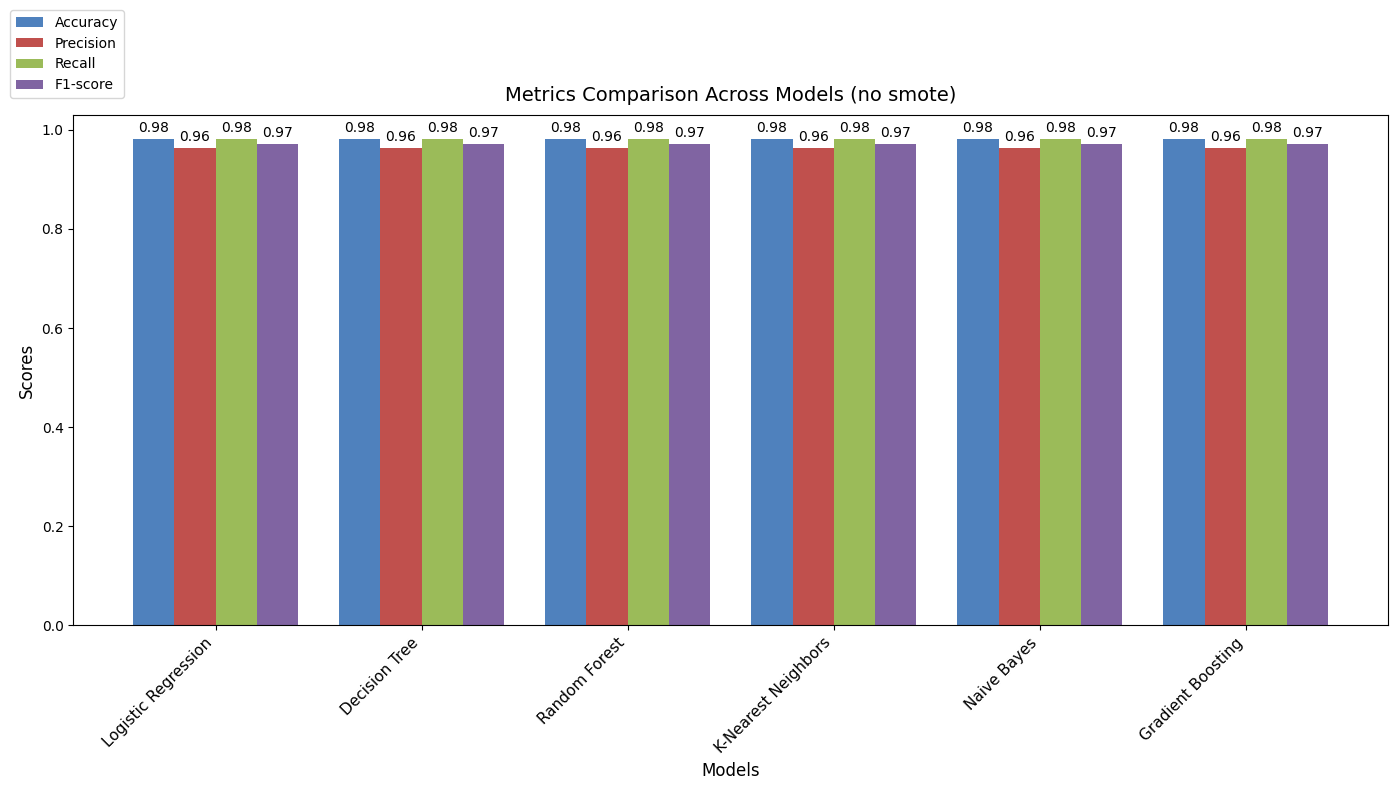

In [103]:

# Assuming you have defined X_train_best, Y_train_best, X_test_best, Y_test_best previously

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    report = classification_report(Y_test, Y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='#4F81BD')  # Blue
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision', color='#C0504D')  # Red
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall', color='#9BBB59')  # Green
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-score', color='#8064A2')  # Purple

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Metrics Comparison Across Models (no smote)', fontsize=14, pad=10)  # Move title closer to the plot
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=11)

# Move the legend to the "algorithms" position (near the plot)
fig.legend(loc='upper left', bbox_to_anchor=(0, 0.99), fontsize=10, frameon=True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Adjust layout to prevent clipping
fig.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the title placement further

plt.show()


Phase 1 completed

Phase 2-> trying techniques for handling class imbalance

SMOTE

In [104]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,-1.741514,0,0,0,4,0,4.555139,2.890372,1,0
1,1,0.700706,1,0,1,2,1,4.476882,3.668677,1,0
2,0,-1.519494,0,0,0,2,1,4.708539,2.867899,1,0
3,0,1.233555,0,0,1,2,0,4.234686,3.580737,0,0
4,1,-1.253070,0,0,0,1,0,5.083142,2.949688,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,-1.430686,0,0,0,4,1,4.071417,3.015535,1,0
43396,0,0.611898,0,0,1,0,1,5.364152,4.014580,0,0
43397,0,1.766403,1,0,1,2,1,4.521136,3.363842,0,0
43398,1,-0.098566,0,0,1,2,1,4.596735,3.502550,1,0


In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
sm=SMOTE(random_state=42)

In [107]:
X_resampled,Y_resampled=sm.fit_resample(X,Y)

In [108]:
X_resampled.shape

(85212, 10)

In [109]:
X_train.shape

(30372, 10)

In [110]:
Y_train.shape

(30372,)

In [111]:
Y_resampled.shape

(85212,)

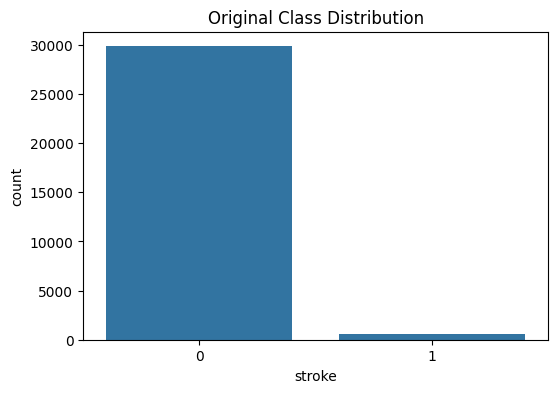

In [112]:
# 1. Plot original class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_train)
plt.title("Original Class Distribution")
plt.show()

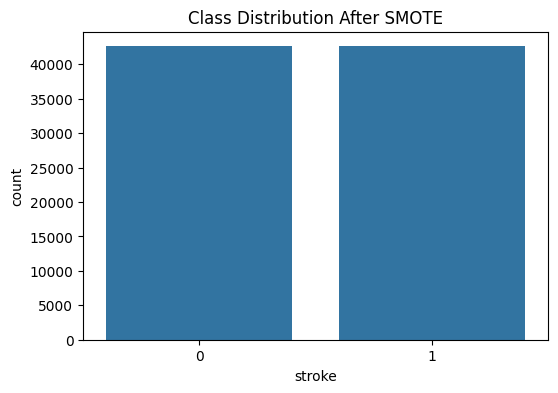

In [113]:
# 2. Plot class distribution after applying SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()


In [114]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_resampled, Y_resampled, test_size=0.30, random_state=1234)

In [178]:
X_train_smote

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
81092,0,1.716816,0,0,1,2,0,4.769756,3.466609,1
2099,0,1.499979,0,0,1,3,1,4.701117,3.459466,1
43926,0,1.598167,0,0,0,0,1,4.286058,3.260920,1
17722,0,-0.142970,0,0,0,2,1,4.917057,3.044522,1
74490,1,1.552172,0,0,1,2,1,4.279460,3.343305,1
...,...,...,...,...,...,...,...,...,...,...
32399,0,-0.009758,0,0,1,2,0,4.459566,3.222868,2
82584,0,0.652983,0,0,1,0,1,4.695036,3.356927,1
60620,1,0.087495,0,0,1,3,1,5.007516,3.493271,1
34086,0,0.523090,0,0,1,2,0,4.849840,3.269569,2


In [182]:
original_values = sc.inverse_transform([X_test_smote.iloc[59]])

# Now original_values contains the original values before scaling
print(original_values)

[[ 64.74023722  38.81010912  42.21974694  42.21974694  64.74023722
   87.26072749  42.21974694 141.90705327 115.9986816   64.74023722]]


In [183]:
Y_test_smote.iloc[59]

1

In [179]:
Y_train_smote

81092    1
2099     0
43926    1
17722    0
74490    1
        ..
32399    0
82584    1
60620    1
34086    0
58067    1
Name: stroke, Length: 59648, dtype: int64

Logistic Regression

In [115]:
lr_balanced=LogisticRegression()

In [116]:
lr_balanced.fit(X_train_smote,Y_train_smote)

LogisticRegression()

In [117]:
Y_pred_lr_balanced=lr_balanced.predict(X_test_smote)

In [118]:
score_lr_balanced=accuracy_score(Y_test_smote,Y_pred_lr_balanced)

In [119]:
score_lr_balanced

0.7763652010639962

In [120]:
pd.DataFrame(classification_report(Y_test_smote,Y_pred_lr_balanced,output_dict=True)).T

,precision,recall,f1-score,support
0,0.799573,0.735192,0.766032,12730.000000
1,0.756765,0.817204,0.785824,12834.000000
accuracy,0.776365,0.776365,0.776365,0.776365
macro avg,0.778169,0.776198,0.775928,25564.000000
weighted avg,0.778082,0.776365,0.775968,25564.000000


Accuracy decreased but atleast precision of class 1 is some what better after doing balancing.

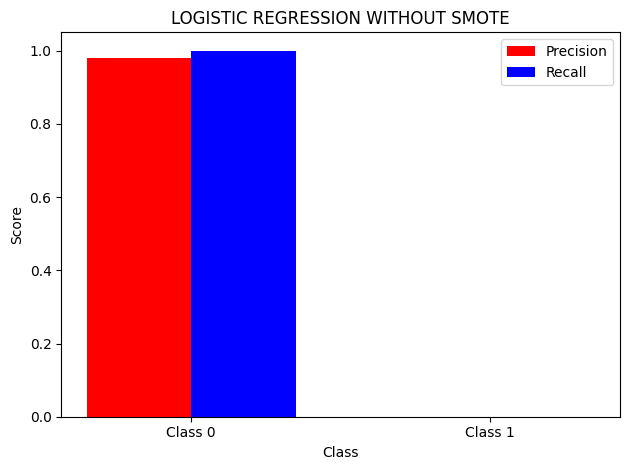

In [121]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.981102,0.000000]	
recall = [1.000000, 0.000000]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('LOGISTIC REGRESSION WITHOUT SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


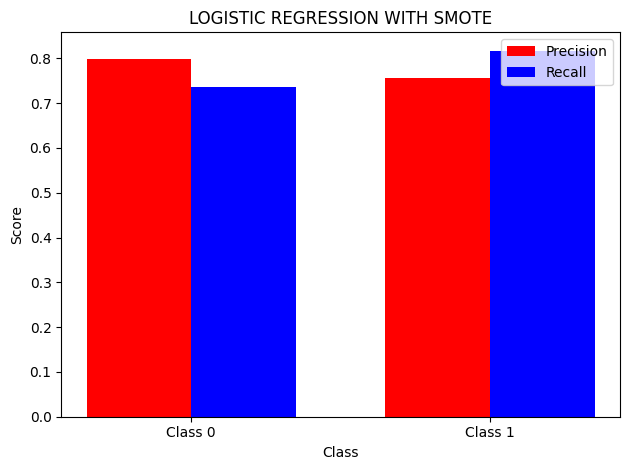

In [122]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.799573,0.756765]	
recall = [0.735192, 0.817204]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('LOGISTIC REGRESSION WITH SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Random Forest

In [123]:
rfc_balanced=RandomForestClassifier()
rfc_balanced.fit(X_train_smote,Y_train_smote)
Y_pred_rfc_balanced=rfc_balanced.predict(X_test_smote)
score_rfc_balanced=accuracy_score(Y_test_smote,Y_pred_rfc_balanced)
print(score_rfc_balanced)
pd.DataFrame(classification_report(Y_test_smote,Y_pred_rfc_balanced,output_dict=True)).T

0.9570880926302613


,precision,recall,f1-score,support
0,0.976333,0.936528,0.956016,12730.000000
1,0.939489,0.977482,0.958109,12834.000000
accuracy,0.957088,0.957088,0.957088,0.957088
macro avg,0.957911,0.957005,0.957063,25564.000000
weighted avg,0.957836,0.957088,0.957067,25564.000000


Now this is what we call improvement

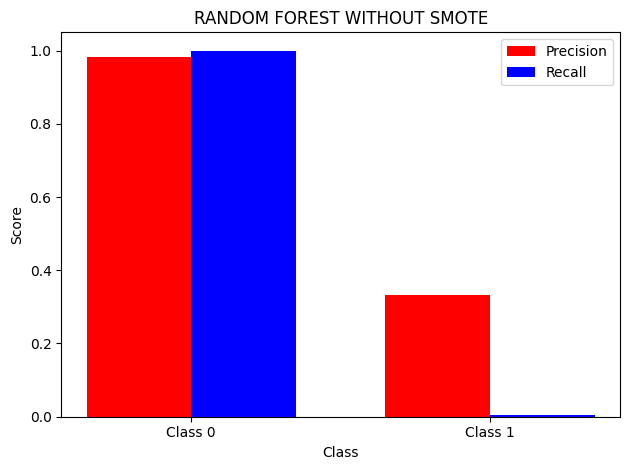

In [124]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.981174,0.333333]	
recall = [0.999843, 0.004065]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('RANDOM FOREST WITHOUT SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


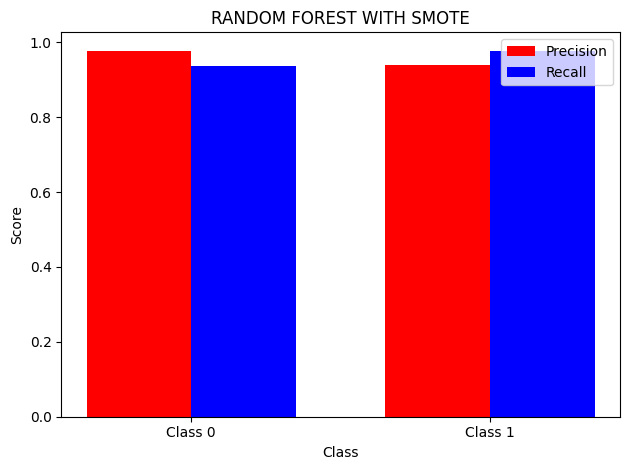

In [125]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.976306,0.938505]	
recall = [0.935428, 0.977482]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('RANDOM FOREST WITH SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


KNN

In [153]:
knn_balanced=KNeighborsClassifier()
knn_balanced.fit(X_train_smote,Y_train_smote)
Y_pred_knn_balanced=knn_balanced.predict(X_test_smote)
score_knn_balanced=accuracy_score(Y_test_smote,Y_pred_knn_balanced)
print(score_knn_balanced)
pd.DataFrame(classification_report(Y_test_smote,Y_pred_knn_balanced,output_dict=True)).T

0.9113206071037396


,precision,recall,f1-score,support
0,0.980086,0.838963,0.904050,12730.000000
1,0.860230,0.983092,0.917567,12834.000000
accuracy,0.911321,0.911321,0.911321,0.911321
macro avg,0.920158,0.911027,0.910809,25564.000000
weighted avg,0.919915,0.911321,0.910836,25564.000000


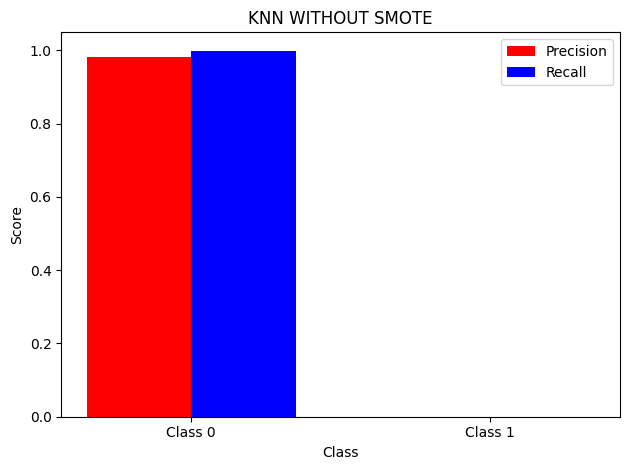

In [127]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.981086,0.000000]	
recall = [0.999139, 0.000000]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('KNN WITHOUT SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


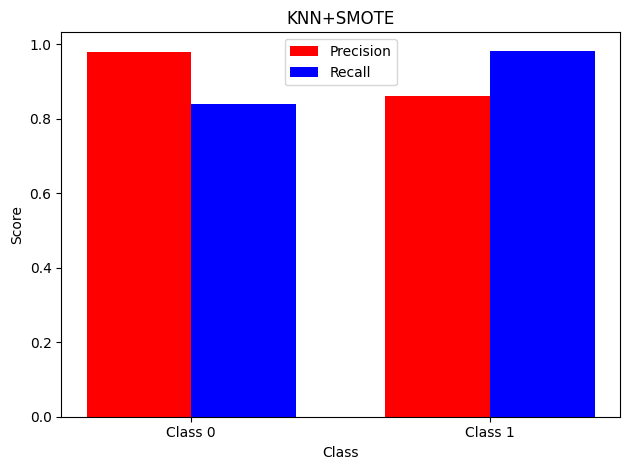

In [155]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.980086, 0.860230]
recall = [0.838963, 0.983092]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('KNN+SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Naive Bayes

In [129]:
nb_balanced=GaussianNB()
nb_balanced.fit(X_train_smote,Y_train_smote)
Y_pred_nb_balanced=nb_balanced.predict(X_test_smote)
score_nb_balanced=accuracy_score(Y_test_smote,Y_pred_nb_balanced)
print(score_nb_balanced)
pd.DataFrame(classification_report(Y_test_smote,Y_pred_nb_balanced,output_dict=True)).T

0.7562588014395243


,precision,recall,f1-score,support
0,0.774706,0.719874,0.746284,12730.000000
1,0.740371,0.792348,0.765479,12834.000000
accuracy,0.756259,0.756259,0.756259,0.756259
macro avg,0.757539,0.756111,0.755882,25564.000000
weighted avg,0.757469,0.756259,0.755921,25564.000000


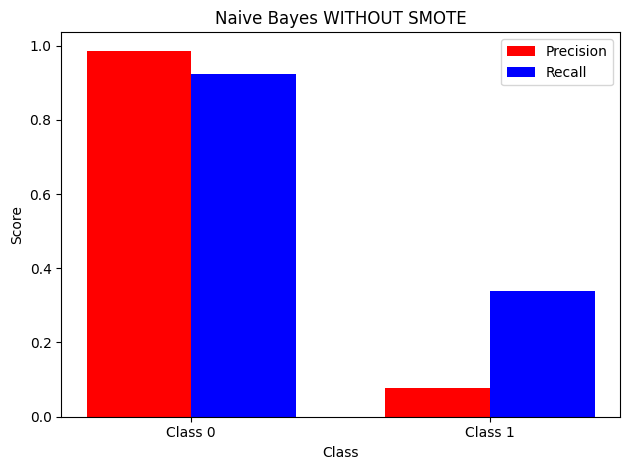

In [130]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.986358,0.077643]	
recall = [0.922794, 0.337398]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Naive Bayes WITHOUT SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


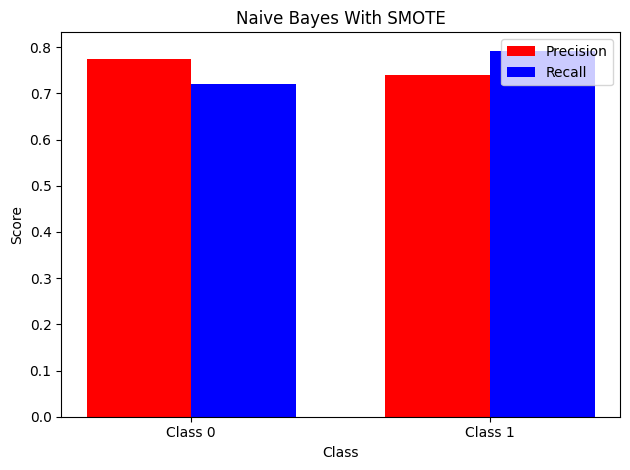

In [131]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.774706,0.740371]	
recall = [0.719874, 0.792348]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Naive Bayes With SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Decision Tree

In [132]:
dtc_balanced=DecisionTreeClassifier()
dtc_balanced.fit(X_train_smote,Y_train_smote)
Y_pred_dtc_balanced=dtc_balanced.predict(X_test_smote)
score_dtc_balanced=accuracy_score(Y_test_smote,Y_pred_dtc_balanced)
print(score_dtc_balanced)
pd.DataFrame(classification_report(Y_test_smote,Y_pred_dtc_balanced,output_dict=True)).T

0.9710139258332029


,precision,recall,f1-score,support
0,0.975716,0.965829,0.970747,12730.000000
1,0.966443,0.976157,0.971276,12834.000000
accuracy,0.971014,0.971014,0.971014,0.971014
macro avg,0.971080,0.970993,0.971012,25564.000000
weighted avg,0.971061,0.971014,0.971013,25564.000000


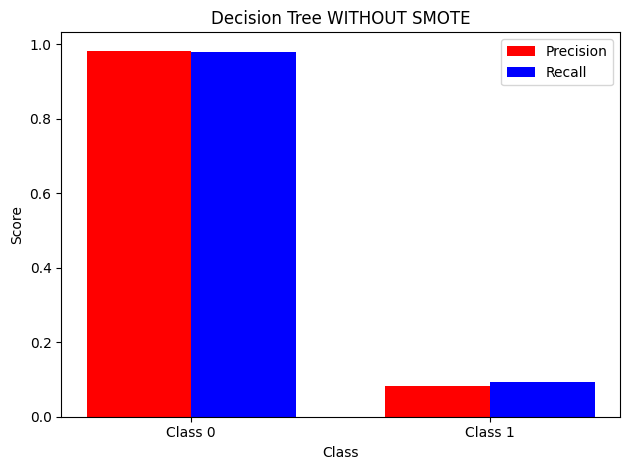

In [133]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.982493,0.082437]	
recall = [0.979955, 0.093496]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Decision Tree WITHOUT SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


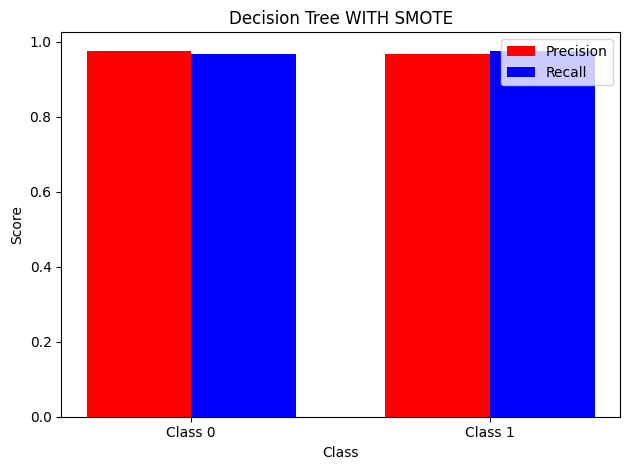

In [134]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.975724,0.966741]	
recall = [0.966143, 0.976157]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Decision Tree WITH SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Gradient Boosting

In [135]:
gb_balanced=GradientBoostingClassifier()
gb_balanced.fit(X_train_smote,Y_train_smote)
Y_pred_gb_balanced=gb_balanced.predict(X_test_smote)
score_gb_balanced=accuracy_score(Y_test_smote,Y_pred_gb_balanced)
print(score_gb_balanced)
pd.DataFrame(classification_report(Y_test_smote,Y_pred_gb_balanced,output_dict=True)).T

0.8337505867626349


,precision,recall,f1-score,support
0,0.860116,0.795522,0.826559,12730.000000
1,0.811240,0.871669,0.840370,12834.000000
accuracy,0.833751,0.833751,0.833751,0.833751
macro avg,0.835678,0.833596,0.833464,25564.000000
weighted avg,0.835578,0.833751,0.833492,25564.000000


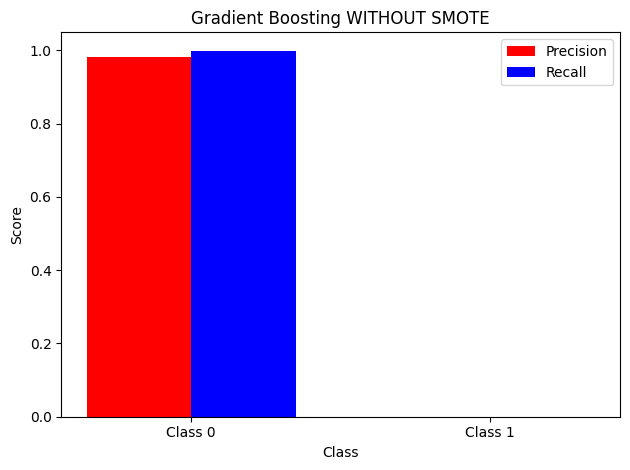

In [136]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.981094,0.000000]	
recall = [0.999608, 0.000000]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Gradient Boosting WITHOUT SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


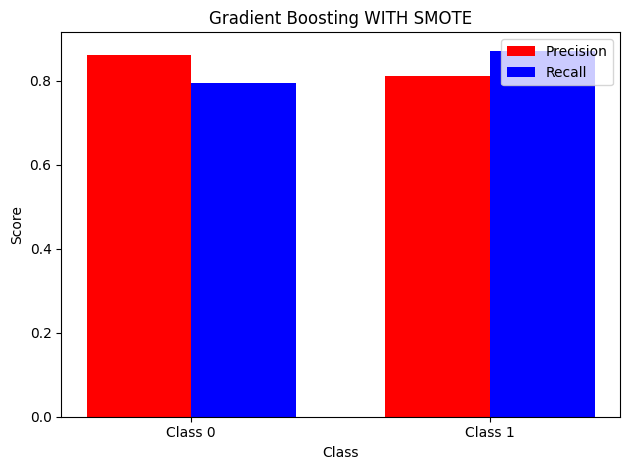

In [137]:

# Data
classes = ['Class 0', 'Class 1']
precision = [0.860116,0.811240]	
recall = [0.795522, 0.871669]

# Create the figure and axis
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(classes))

# Plot the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='r')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='b')

# Labels and titles
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Gradient Boosting WITH SMOTE')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [138]:

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes':GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()

}

# Evaluate classifiers without SMOTE
results_without_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True)).T
    results_without_smote[name] = {'accuracy': accuracy, 'metrics': report}

# Evaluate classifiers with SMOTE
results_with_smote = {}
for name, clf in classifiers.items():
    clf.fit(X_train_smote, Y_train_smote)
    Y_pred = clf.predict(X_test_smote)
    accuracy = accuracy_score(Y_test_smote, Y_pred)
    report = pd.DataFrame(classification_report(Y_test_smote, Y_pred, output_dict=True)).T
    results_with_smote[name] = {'accuracy': accuracy, 'metrics': report}


c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

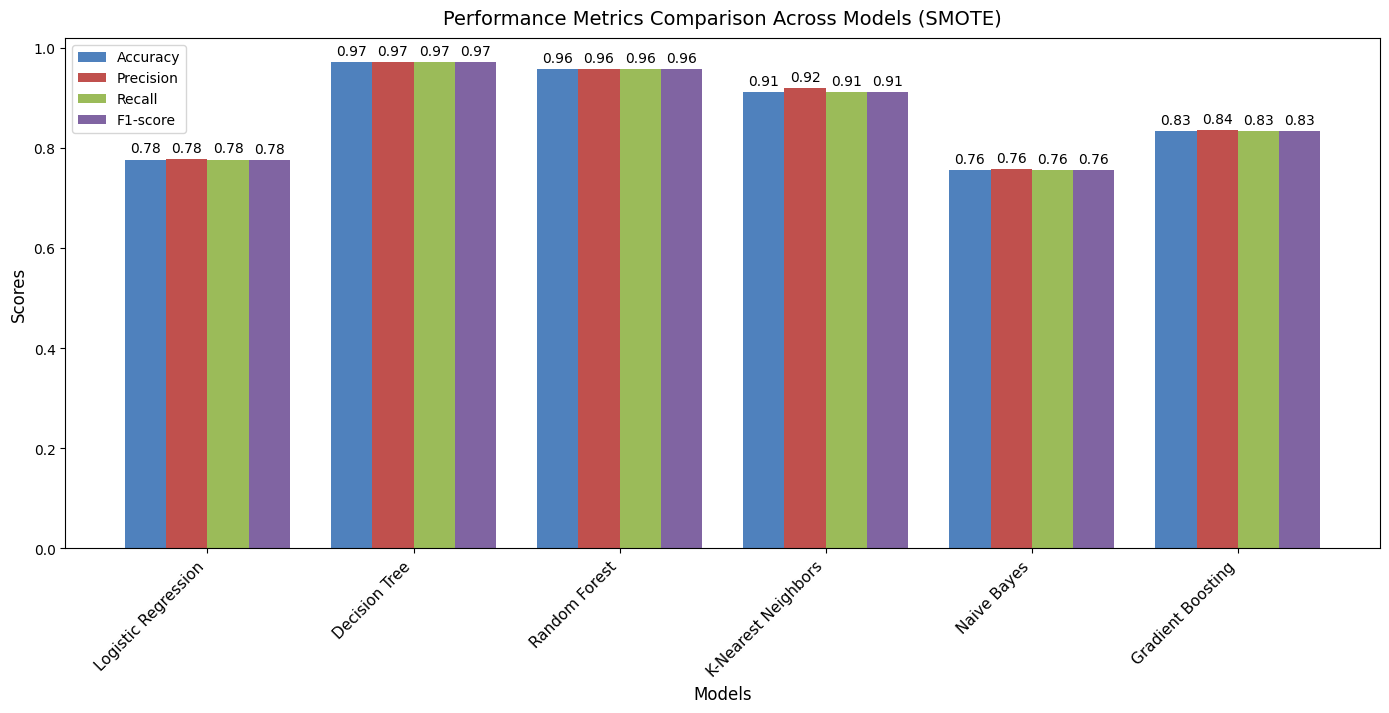

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Assuming X_train_smote, Y_train_smote, X_test_smote, Y_test_smote are already defined
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_smote, Y_train_smote)
    
    # Predict on SMOTE test set
    y_pred = model.predict(X_test_smote)
    
    # Calculate metrics
    report = classification_report(Y_test_smote, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='#4F81BD')  # Blue
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision', color='#C0504D')  # Red
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall', color='#9BBB59')  # Green
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-score', color='#8064A2')  # Purple

# Add labels, title, and ticks
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Performance Metrics Comparison Across Models (SMOTE)', fontsize=14, pad=10)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=11)

# Add a legend
ax.legend(loc='best', fontsize=10)

# Annotate bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate all bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Adjust layout to prevent clipping
fig.tight_layout()
plt.subplots_adjust(top=0.85)

# Show plot
plt.show()


Bahut hua SMOTE

Now different technique

ADASYN

In [140]:
adasyn=ADASYN(random_state=42)

In [141]:
X_resampled_adasyn,Y_resampled_adasyn=adasyn.fit_resample(X,Y)

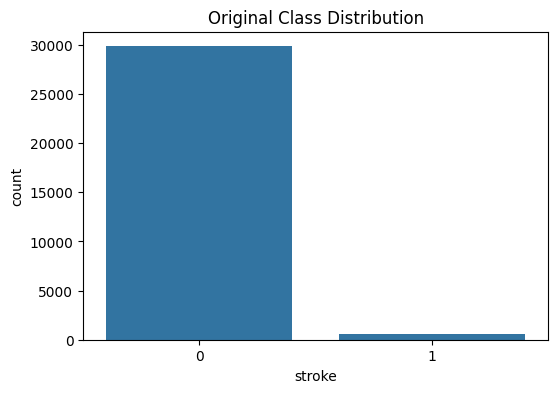

In [142]:
# 1. Plot original class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_train)
plt.title("Original Class Distribution")
plt.show()


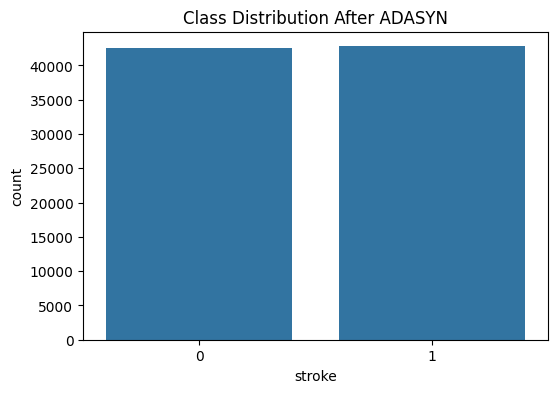

In [143]:

# 2. Plot class distribution after applying ADASYN
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_resampled_adasyn)
plt.title("Class Distribution After ADASYN")
plt.show()


In [144]:
X_train_adasyn, X_test_adasyn, Y_train_adasyn, Y_test_adasyn = train_test_split(X_resampled_adasyn, Y_resampled_adasyn, test_size=0.30, random_state=1234)

Logistic Regression + ADASYN

In [145]:

lr_balanced_adasyn=LogisticRegression()
lr_balanced_adasyn.fit(X_train_adasyn,Y_train_adasyn)
Y_pred_lr_balanced_adasyn=lr_balanced_adasyn.predict(X_test_adasyn)
score_lr_balanced_adasyn=accuracy_score(Y_test_adasyn,Y_pred_lr_balanced_adasyn)
score_lr_balanced_adasyn
pd.DataFrame(classification_report(Y_test_adasyn,Y_pred_lr_balanced_adasyn,output_dict=True)).T


,precision,recall,f1-score,support
0,0.796959,0.733318,0.763815,12723.000000
1,0.756022,0.815608,0.784685,12891.000000
accuracy,0.774733,0.774733,0.774733,0.774733
macro avg,0.776491,0.774463,0.774250,25614.000000
weighted avg,0.776356,0.774733,0.774319,25614.000000


Random Forest+ ADASYN

In [146]:
rfc_balanced_adasyn=RandomForestClassifier()
rfc_balanced_adasyn.fit(X_train_adasyn,Y_train_adasyn)
Y_pred_rfc_balanced_adasyn=rfc_balanced_adasyn.predict(X_test_adasyn)
score_rfc_balanced_adasyn=accuracy_score(Y_test_adasyn,Y_pred_rfc_balanced_adasyn)
print(score_rfc_balanced_adasyn)
pd.DataFrame(classification_report(Y_test_adasyn,Y_pred_rfc_balanced_adasyn,output_dict=True)).T

0.9575622706332474


,precision,recall,f1-score,support
0,0.978454,0.935157,0.956316,12723.000000
1,0.938680,0.979676,0.958740,12891.000000
accuracy,0.957562,0.957562,0.957562,0.957562
macro avg,0.958567,0.957416,0.957528,25614.000000
weighted avg,0.958437,0.957562,0.957536,25614.000000


Decision Tree + ADASYN

In [147]:
dtc_balanced_adasyn=DecisionTreeClassifier()
dtc_balanced_adasyn.fit(X_train_adasyn,Y_train_adasyn)
Y_pred_dtc_balanced_adasyn=dtc_balanced_adasyn.predict(X_test_adasyn)
score_dtc_balanced_adasyn=accuracy_score(Y_test_adasyn,Y_pred_dtc_balanced_adasyn)
print(score_dtc_balanced_adasyn)
pd.DataFrame(classification_report(Y_test_adasyn,Y_pred_dtc_balanced_adasyn,output_dict=True)).T

0.968415710158507


,precision,recall,f1-score,support
0,0.972553,0.963609,0.968060,12723.000000
1,0.964407,0.973160,0.968763,12891.000000
accuracy,0.968416,0.968416,0.968416,0.968416
macro avg,0.968480,0.968384,0.968412,25614.000000
weighted avg,0.968453,0.968416,0.968414,25614.000000


KNN+ADASYN

In [148]:
knn_balanced_adasyn=KNeighborsClassifier()
knn_balanced_adasyn.fit(X_train_adasyn,Y_train_adasyn)
Y_pred_knn_balanced_adasyn=rfc_balanced.predict(X_test_adasyn)
score_knn_balanced_adasyn=accuracy_score(Y_test_adasyn,Y_pred_knn_balanced_adasyn)
print(score_knn_balanced_adasyn)
pd.DataFrame(classification_report(Y_test_adasyn,Y_pred_knn_balanced_adasyn,output_dict=True)).T

0.9589677520106192


,precision,recall,f1-score,support
0,0.973394,0.943174,0.958046,12723.000000
1,0.945582,0.974556,0.959850,12891.000000
accuracy,0.958968,0.958968,0.958968,0.958968
macro avg,0.959488,0.958865,0.958948,25614.000000
weighted avg,0.959397,0.958968,0.958954,25614.000000


Naive bayes+ADASYN

In [149]:
nb_balanced_adasyn=GaussianNB()
nb_balanced_adasyn.fit(X_train_adasyn,Y_train_adasyn)
Y_pred_nb_balanced_adasyn=nb_balanced.predict(X_test_adasyn)
score_nb_balanced_adasyn=accuracy_score(Y_test_adasyn,Y_pred_nb_balanced_adasyn)
print(score_nb_balanced_adasyn)
pd.DataFrame(classification_report(Y_test_adasyn,Y_pred_nb_balanced_adasyn,output_dict=True)).T

0.75638322792223


,precision,recall,f1-score,support
0,0.773060,0.721292,0.746280,12723.000000
1,0.741978,0.791017,0.765713,12891.000000
accuracy,0.756383,0.756383,0.756383,0.756383
macro avg,0.757519,0.756155,0.755996,25614.000000
weighted avg,0.757417,0.756383,0.756060,25614.000000


Gradient Boosting+ADASYN

In [150]:
gb_balanced_adasyn=GradientBoostingClassifier()
gb_balanced_adasyn.fit(X_train_adasyn,Y_train_adasyn)
Y_pred_gb_balanced_adasyn=gb_balanced_adasyn.predict(X_test_adasyn)
score_gb_balanced_adasyn=accuracy_score(Y_test_adasyn,Y_pred_gb_balanced_adasyn)
print(score_gb_balanced_adasyn)
pd.DataFrame(classification_report(Y_test_adasyn,Y_pred_gb_balanced_adasyn,output_dict=True)).T

0.8355586788475052


,precision,recall,f1-score,support
0,0.872082,0.783935,0.825662,12723.000000
1,0.806094,0.886510,0.844392,12891.000000
accuracy,0.835559,0.835559,0.835559,0.835559
macro avg,0.839088,0.835222,0.835027,25614.000000
weighted avg,0.838872,0.835559,0.835088,25614.000000


In [151]:

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes':GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()

}

# Evaluate classifiers without adasyn
results_without_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True)).T
    results_without_adasyn[name] = {'accuracy': accuracy, 'metrics': report}

# Evaluate classifiers with adasyn
results_with_adasyn = {}
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, Y_train_adasyn)
    Y_pred = clf.predict(X_test_adasyn)
    accuracy = accuracy_score(Y_test_adasyn, Y_pred)
    report = pd.DataFrame(classification_report(Y_test_adasyn, Y_pred, output_dict=True)).T
    results_with_adasyn[name] = {'accuracy': accuracy, 'metrics': report}


c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

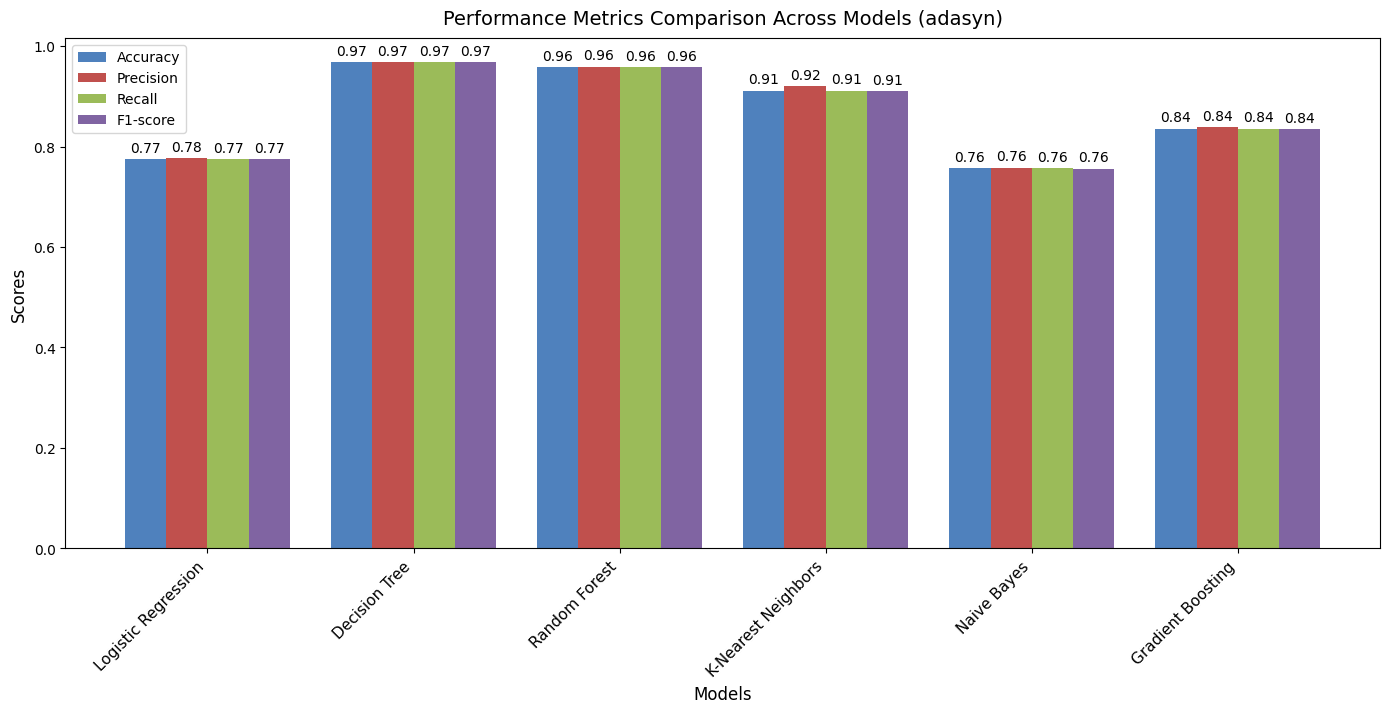

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Assuming X_train_adasyn, Y_train_adasyn, X_test_adasyn, Y_test_adasyn are already defined
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_adasyn, Y_train_adasyn)
    
    # Predict on adasyn test set
    y_pred = model.predict(X_test_adasyn)
    
    # Calculate metrics
    report = classification_report(Y_test_adasyn, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='#4F81BD')  # Blue
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision', color='#C0504D')  # Red
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall', color='#9BBB59')  # Green
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-score', color='#8064A2')  # Purple

# Add labels, title, and ticks
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Performance Metrics Comparison Across Models (adasyn)', fontsize=14, pad=10)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=11)

# Add a legend
ax.legend(loc='best', fontsize=10)

# Annotate bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate all bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Adjust layout to prevent clipping
fig.tight_layout()
plt.subplots_adjust(top=0.85)

# Show plot
plt.show()


In [156]:
dtc_balanced=DecisionTreeClassifier()
dtc_balanced.fit(X_train_smote,Y_train_smote)
Y_pred_dtc_balanced=dtc_balanced.predict(X_test_smote)
score_dtc_balanced=accuracy_score(Y_test_smote,Y_pred_dtc_balanced)
print(score_dtc_balanced)
pd.DataFrame(classification_report(Y_test_smote,Y_pred_dtc_balanced,output_dict=True)).T

0.9708965733062118


,precision,recall,f1-score,support
0,0.975333,0.965986,0.970637,12730.000000
1,0.966579,0.975767,0.971152,12834.000000
accuracy,0.970897,0.970897,0.970897,0.970897
macro avg,0.970956,0.970877,0.970894,25564.000000
weighted avg,0.970938,0.970897,0.970895,25564.000000


DTC+SMOTE PERFORMED THE BEST

In [157]:
import pickle
pickle.dump(dtc_balanced,open('dtc_balanced.pkl','wb'))

Making a prediction

In [160]:
model = pickle.load(open('dtc_balanced.pkl', 'rb'))

In [166]:
# Step 3: Use the model to predict
prediction = model.predict([X_test_smote.iloc[5]])


c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [172]:
X_test_smote.iloc[5]

gender               1.000000
age                  0.735080
hypertension         1.000000
heart_disease        0.000000
ever_married         1.000000
work_type            0.000000
Residence_type       1.000000
avg_glucose_level    5.288848
bmi                  3.187239
smoking_status       1.000000
Name: 61659, dtype: float64

In [167]:
prediction

array([1], dtype=int64)

In [170]:
# Step 3: Use the model to predict
prediction2 = model.predict([X_test_smote.iloc[84]])


c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [171]:
prediction2

array([0], dtype=int64)

In [173]:
X_test_smote.iloc[84]

gender               1.000000
age                 -1.430686
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            4.000000
Residence_type       0.000000
avg_glucose_level    4.237001
bmi                  3.157000
smoking_status       0.000000
Name: 4356, dtype: float64

In [177]:
X_test_smote.iloc[84]

gender               1.000000
age                 -1.430686
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            4.000000
Residence_type       0.000000
avg_glucose_level    4.237001
bmi                  3.157000
smoking_status       0.000000
Name: 4356, dtype: float64

In [184]:
X_test.iloc[5]

gender               0.000000
age                 -0.498202
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            2.000000
Residence_type       0.000000
avg_glucose_level    4.466942
bmi                  3.054001
smoking_status       1.000000
Name: 39146, dtype: float64

In [185]:
# for inverse transformation
inversed = sc.inverse_transform(df)
print(inversed)

[[ 64.74023722   3.          42.21974694 ... 107.31233601  64.74023722
   42.21974694]
 [ 64.74023722  58.          64.74023722 ... 124.84014594  64.74023722
   42.21974694]
 [ 42.21974694   8.          42.21974694 ... 106.80623627  64.74023722
   42.21974694]
 ...
 [ 42.21974694  82.          64.74023722 ... 117.97510887  42.21974694
   42.21974694]
 [ 64.74023722  40.          42.21974694 ... 121.09888736  64.74023722
   42.21974694]
 [ 42.21974694  82.          42.21974694 ... 110.35078519  64.74023722
   42.21974694]]


In [189]:
# Assuming 'sc' is your StandardScaler
d = X_test_smote.iloc[152]  # Sample row from X_test_smote
d_reshaped = d.values.reshape(1, -1)  # Reshape to 2D (1, n_features)

# Inverse transformation to get the original values
inversed = sc.inverse_transform(d_reshaped)

# Print the inversed values
print(inversed)

print(Y_test_smote.iloc[152])

[[ 64.74023722  71.19726564  64.74023722  42.21974694  64.74023722
  109.78121777  42.21974694 146.32306121 118.89928376  64.74023722]]
1


In [ ]:
dtc_balanced.predict()

In [194]:

# Example test data (manually entered values)
test_data = {
    'gender': "Female",  # Gender (e.g., "Male", "Female")
    'age': 45,  # Age (e.g., 45)
    'hypertension': "No",  # Hypertension (e.g., "Yes", "No")
    'heart_disease': "No",  # Heart Disease (e.g., "Yes", "No")
    'ever_married': "Yes",  # Marital Status (e.g., "Yes", "No")
    'work_type': "Private",  # Work Type (e.g., "children", "Private", etc.)
    'Residence_type': "Rural",  # Residence Type (e.g., "Rural", "Urban")
    'avg_glucose_level': 90,  # Glucose Level (e.g., 90)
    'bmi': 41,  # BMI (e.g., 25)
    'smoking_status': "Yes"  # Smoking Status (e.g., "Yes", "No", "Occasionally")
}

# Manually map the smoking status
smoking_status_mapping = {
    "Yes": "smokes", 
    "No": "never smoked", 
    "Occasionally": "formerly smoked"
}
test_data['smoking_status'] = smoking_status_mapping[test_data['smoking_status']]

# Scale the age using StandardScaler (same as during training)
scaler = StandardScaler()
scaled_age = scaler.fit_transform([[test_data['age']]])[0][0]
test_data['age'] = scaled_age

# Log transformation for glucose level and BMI
test_data['avg_glucose_level'] = np.log(test_data['avg_glucose_level'])
test_data['bmi'] = np.log(test_data['bmi'])

# Encode categorical features using LabelEncoder (same as during training)
encode_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()

for feature in encode_features:
    test_data[feature] = le.fit_transform([test_data[feature]])[0]

# Convert the test data to a dataframe
test_df = pd.DataFrame([test_data])

# Make prediction
prediction = dtc_balanced.predict(test_df)

# Output the result
if prediction == 1:
    print("Test Result: You are at risk of having a stroke.")
else:
    print("Test Result: You are not at risk of having a stroke.")

Test Result: You are not at risk of having a stroke.


In [198]:
# Combine the features and target variable into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=[f"Feature_{i}" for i in range(X_resampled.shape[1])])
df_resampled['stroke'] = Y_resampled

# Show the first few rows of the new dataset
print(df_resampled.head())

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

   Feature_6  Feature_7  Feature_8  Feature_9  stroke  
0        NaN        NaN        NaN        NaN       0  
1        NaN        NaN        NaN        NaN       0  
2        NaN        NaN        NaN        NaN       0  
3        NaN        NaN        NaN        NaN       0  
4        NaN        NaN        NaN        NaN       0  
